In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#print options to data exploration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
# run if using google colab 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#everyone can set their own while working. Personally I leave this blank because relative works for me
personal_path = '/content/drive/My Drive/ML Final Project/'

In [5]:
#csv files were pulled at 12:30pm 11/21/2021

#get paths to csv files in google drive
path_vaccine = os.path.join(personal_path, "Data/vaccinations.csv")
path_covid = os.path.join(personal_path, "Data/owid-covid-data.csv")
path_variant = os.path.join(personal_path, "Data/covid-variants-area.csv")

#load csv files to dataframes
vaccine = pd.read_csv(path_vaccine)
covid = pd.read_csv(path_covid)
variant = pd.read_csv(path_variant)

#change date columns to datetime objects
vaccine['date'] = vaccine['date'].astype('datetime64[ns]')
covid['date'] = covid['date'].astype('datetime64[ns]')
variant['Day'] = variant['Day'].astype('datetime64[ns]')

#set multi-level indices, remove duplicate dates in variant data frame
vaccine.set_index(['iso_code','date'], inplace = True)
covid.set_index(['iso_code','date'], inplace = True)
variant.rename(columns = {'Code':'iso_code', 'Day':'date'}, inplace=True)
variant = variant.groupby(['iso_code','date'], as_index=False).mean()
variant.set_index(['iso_code','date'], inplace = True)

#join data frames
non_dupes = vaccine.columns.difference(covid.columns)
full = covid.join(vaccine[non_dupes], how='outer', lsuffix='_covid', rsuffix='_vaccine')
full = full.join(variant, how='outer')

#sort data frame using multi-level index
full.sort_values(by = ['iso_code','date'], ascending=True, inplace = True)

#save joined data set to a csv
full.to_csv(os.path.join(personal_path, 'Data/full.csv'), sep=',')

In [ ]:
path_full = os.path.join(personal_path, "Data/full.csv")
df = pd.read_csv(path_full)

#drop day from date column leaving on year and month
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m')

#set multi-index
df.set_index(['iso_code','date'], inplace = True)

#average data with the same index, efficeively aggregating data for each country for each month
df_averaged_by_month = df.groupby(level = ['iso_code','date'] , as_index=True).mean(numeric_only=True)

#save dataframe
df_averaged_by_month.to_csv(os.path.join(personal_path, 'Data/df_averaged_by_month.csv'), sep=',')

#get the most recent month's data i.e. 2021-11
df_last_month = df_averaged_by_month.reset_index()[df_averaged_by_month.reset_index()['date']=='2021-11']

#save dataframe
df_last_month.to_csv(os.path.join(personal_path, 'Data/df_november_2021.csv'), sep=',')

#check proportion of missing data in each column
print(df_averaged_by_month.isna().sum() / len(df_averaged_by_month))



total_cases                                   0.070026
new_cases                                     0.070026
new_cases_smoothed                            0.078992
total_deaths                                  0.150512
new_deaths                                    0.148377
new_deaths_smoothed                           0.078992
total_cases_per_million                       0.074722
new_cases_per_million                         0.074722
new_cases_smoothed_per_million                0.083689
total_deaths_per_million                      0.155209
new_deaths_per_million                        0.153074
new_deaths_smoothed_per_million               0.083689
reproduction_rate                             0.217549
icu_patients                                  0.877455
icu_patients_per_million                      0.877455
hosp_patients                                 0.854825
hosp_patients_per_million                     0.854825
weekly_icu_admissions                         0.928907
weekly_icu

In [ ]:
path_full = os.path.join(personal_path, "Data/full.csv")
df = pd.read_csv(path_full)
df['date'] = pd.to_datetime(df['date'])

#get data for most recent day
df_most_recent_day = df.loc[df.reset_index().groupby(['iso_code'])['date'].idxmax()]

#save to dataframe
df_most_recent_day.to_csv(os.path.join(personal_path, 'Data/df_most_recent_day.csv'), sep=',')

#check proportion of missing data in each column
print(df_most_recent_day.isna().sum() / len(df_most_recent_day))

iso_code                                      0.000000
date                                          0.000000
continent                                     0.070539
location                                      0.016598
total_cases                                   0.141079
new_cases                                     0.141079
new_cases_smoothed                            0.141079
total_deaths                                  0.174274
new_deaths                                    0.174274
new_deaths_smoothed                           0.141079
total_cases_per_million                       0.145228
new_cases_per_million                         0.145228
new_cases_smoothed_per_million                0.145228
total_deaths_per_million                      0.178423
new_deaths_per_million                        0.178423
new_deaths_smoothed_per_million               0.145228
reproduction_rate                             1.000000
icu_patients                                  1.000000
icu_patien

In [ ]:
path_full = os.path.join(personal_path, "Data/full.csv")
df = pd.read_csv(path_full)

#get data corresponding to the USA only
df_usa_only = df[df['iso_code']=='USA']

#save dataframe
df_usa_only.to_csv(os.path.join(personal_path,'Data/df_usa_only.csv'), sep=',')

#check proportion of missing data in each column
print(df_usa_only.isna().sum() / len(df_usa_only))

iso_code                                      0.000000
date                                          0.000000
continent                                     0.000000
location                                      0.000000
total_cases                                   0.000000
new_cases                                     0.001495
new_cases_smoothed                            0.008969
total_deaths                                  0.056801
new_deaths                                    0.056801
new_deaths_smoothed                           0.008969
total_cases_per_million                       0.000000
new_cases_per_million                         0.001495
new_cases_smoothed_per_million                0.008969
total_deaths_per_million                      0.056801
new_deaths_per_million                        0.056801
new_deaths_smoothed_per_million               0.008969
reproduction_rate                             0.079223
icu_patients                                  0.263079
icu_patien

In [7]:
path_full = os.path.join(personal_path, "Data/full.csv")
df = pd.read_csv(path_full)

#get rows with variant data which is usually available on a biweekly basis
df = df[df['Alpha'].notna()]

#save dataframe
df.to_csv(os.path.join(personal_path, 'Data/logan_biweekly.csv'), sep=',')
df_sub = df[['Beta','Epsilon','Gamma','Kappa','Iota','Eta','Delta','Alpha','non_who','Lambda','Mu', 'total_vaccinations_per_hundred','gdp_per_capita','aged_70_older','life_expectancy','new_cases_smoothed_per_million','new_deaths_smoothed_per_million']]

#check proportion of missing data in each column
print(df_sub.isna().sum() / len(df_sub))

Beta                               0.000000
Epsilon                            0.000000
Gamma                              0.000000
Kappa                              0.000000
Iota                               0.000000
Eta                                0.000000
Delta                              0.000000
Alpha                              0.000000
non_who                            0.000000
Lambda                             0.000000
Mu                                 0.000000
total_vaccinations_per_hundred     0.443691
gdp_per_capita                     0.009950
aged_70_older                      0.012664
life_expectancy                    0.007237
new_cases_smoothed_per_million     0.021257
new_deaths_smoothed_per_million    0.021257
dtype: float64


<IPython.core.display.Javascript object>


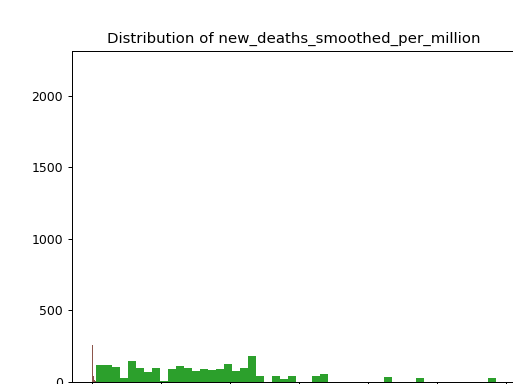

In [ ]:
#subset data into those columns used in the GLM
df_sub = df[['Beta','Epsilon','Gamma','Kappa','Iota','Eta','Delta','Alpha','non_who','Lambda','Mu', 'total_vaccinations_per_hundred','gdp_per_capita','aged_70_older','life_expectancy','new_cases_smoothed_per_million','new_deaths_smoothed_per_million']]

#create a histogram for each column
for column in df_sub.columns:
  plt.hist(df_sub[column], bins=50)
  plt.title('Distribution of ' + str(column))
  plt.savefig('histograms/plot_' + str(column) + '.jpg')
  plt.show()

In [8]:
'''
Impute missing values on subset of interest for GLM
'''
from sklearn.impute import KNNImputer
KNN = KNNImputer(n_neighbors=2)
df_sub_filled = pd.DataFrame(KNN.fit_transform(df_sub), columns=df_sub.columns)

In [9]:
df_sub_filled.columns

Index(['Beta', 'Epsilon', 'Gamma', 'Kappa', 'Iota', 'Eta', 'Delta', 'Alpha',
       'non_who', 'Lambda', 'Mu', 'total_vaccinations_per_hundred',
       'gdp_per_capita', 'aged_70_older', 'life_expectancy',
       'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million'],
      dtype='object')

In [13]:
df_sub_filled.to_csv(personal_path + '/Data/full_imputed_smoothed_per_million.csv', index=False)

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib notebook 

imported_df = pd.read_csv(personal_path + 'Data/full_imputed_smoothed_per_million.csv')

# Get the names of our variables of interest 
X_cols = ['Beta', 'Epsilon', 'Gamma', 'Kappa', 'Iota',
       'Eta', 'Delta', 'Alpha', 'non_who', 'Lambda', 'Mu', 
       'total_vaccinations_per_hundred', 'gdp_per_capita', 
       'aged_70_older', 'life_expectancy']
y_cases_col = ['new_cases_smoothed_per_million']
y_deaths_col = ['new_deaths_smoothed_per_million']

# Create data frames with only the variables of interest
X_df = imported_df[X_cols]
y_cases_df = imported_df[y_cases_col]
y_deaths_df = imported_df[y_deaths_col]

In [66]:
# ------------- NEW_CASES MODEL------------- 
# Train test split for cases model
X_cases_train, X_cases_test, y_cases_train, y_cases_test = train_test_split(X_df, y_cases_df)

# Create and train linear regression
lr = LinearRegression()
lr.fit(X_cases_train, y_cases_train)

# Use linear regression to predict on test data
prediction = lr.predict(X_cases_test)

# Plot predictions against actual values
# plt.plot(X_cases_test, prediction, label='Predictions for new_cases', color='r', alpha=0.8)
plt.scatter(prediction, y_cases_test, label='Predictions vs. Actual values for new_cases', color='b', alpha=0.8)
plt.legend()
plt.show()

# Get score for the model
print(lr.score(X_cases_test, y_cases_test))
# ------------- END NEW_CASES MODEL -------------

#-------------- LOGAN NEW_CASES MODEL ------------
import statsmodels.api as sm
X_cases = X_df.drop(['non_who'], axis=1)
y_cases = y_cases_df
X2 = sm.add_constant(X_cases)
est = sm.OLS(y_cases, X2)
est2 = est.fit()
print(est2.summary())
#-------------- END LOGAN NEW_CASES MODEL ------------

0.054865014197984174
                                  OLS Regression Results                                  
Dep. Variable:     new_cases_smoothed_per_million   R-squared:                       0.064
Model:                                        OLS   Adj. R-squared:                  0.058
Method:                             Least Squares   F-statistic:                     10.73
Date:                            Tue, 30 Nov 2021   Prob (F-statistic):           5.15e-24
Time:                                    00:59:57   Log-Likelihood:                -14876.
No. Observations:                            2211   AIC:                         2.978e+04
Df Residuals:                                2196   BIC:                         2.987e+04
Df Model:                                      14                                         
Covariance Type:                        nonrobust                                         
                                     coef    std err          t      

In [90]:
# ------------- NEW_DEATHS MODEL -------------
# Train test split for cases model
X_deaths_train, X_deaths_test, y_deaths_train, y_deaths_test = train_test_split(X_df, y_cases_df)

# Create and train linear regression
lr = LinearRegression()
lr.fit(X_deaths_train, y_deaths_train)

# Use linear regression to predict on test data
prediction = lr.predict(X_deaths_test)

# Plot predictions against actual values
# plt.plot(X_deaths_test, prediction, label='Predictions for new_deaths', color='r', alpha=0.8)
plt.scatter(prediction, y_deaths_test, label='Predictions vs. Actual values for new_deaths', color='b', alpha=0.8)
plt.legend()
plt.show()

# Get score for the model
print(lr.score(X_deaths_test, y_deaths_test))
# ------------- END NEW_DEATHS MODEL -------------

#--------------LOGAN NEW_DEATHS MODEL ------------
X_deaths = X_df.drop(['non_who'],axis=1)
y_deaths = y_deaths_df
import statsmodels.api as sm
X2 = sm.add_constant(X_deaths)
est = sm.OLS(y_deaths, X2)
est2 = est.fit()
print(est2.summary())
#-------------- END LOGAN NEW_DEATHS MODEL ------------

0.04722126550888528
                                   OLS Regression Results                                  
Dep. Variable:     new_deaths_smoothed_per_million   R-squared:                       0.183
Model:                                         OLS   Adj. R-squared:                  0.178
Method:                              Least Squares   F-statistic:                     35.18
Date:                             Tue, 30 Nov 2021   Prob (F-statistic):           3.12e-86
Time:                                     01:23:56   Log-Likelihood:                -5781.6
No. Observations:                             2211   AIC:                         1.159e+04
Df Residuals:                                 2196   BIC:                         1.168e+04
Df Model:                                       14                                         
Covariance Type:                         nonrobust                                         
                                     coef    std err        

In [89]:
# Investigating Large Condition Number, it seems that the predictors removed on the line below were 
# causing a large condition number because they were highly correlated with other predictors
X_deaths = X_df.drop(['non_who','gdp_per_capita','life_expectancy'], axis=1)
y_deaths = y_deaths_df
import statsmodels.api as sm
X2 = sm.add_constant(X_deaths)
est = sm.OLS(y_deaths, X2)
est2 = est.fit()
print(est2.summary())

X_cases = X_df.drop(['non_who','gdp_per_capita','life_expectancy'], axis=1)
y_cases = y_cases_df
import statsmodels.api as sm
X2 = sm.add_constant(X_cases)
est = sm.OLS(y_cases, X2)
est2 = est.fit()
print(est2.summary())

                                   OLS Regression Results                                  
Dep. Variable:     new_deaths_smoothed_per_million   R-squared:                       0.173
Model:                                         OLS   Adj. R-squared:                  0.169
Method:                              Least Squares   F-statistic:                     38.38
Date:                             Tue, 30 Nov 2021   Prob (F-statistic):           3.40e-82
Time:                                     01:23:51   Log-Likelihood:                -5795.0
No. Observations:                             2211   AIC:                         1.162e+04
Df Residuals:                                 2198   BIC:                         1.169e+04
Df Model:                                       12                                         
Covariance Type:                         nonrobust                                         
                                     coef    std err          t      P>|t|      